In [23]:
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 10.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 6.3 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.



### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [31]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [72]:
column_list = df.columns.tolist()

column_list

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

<Axes: xlabel='median_house_value', ylabel='Count'>

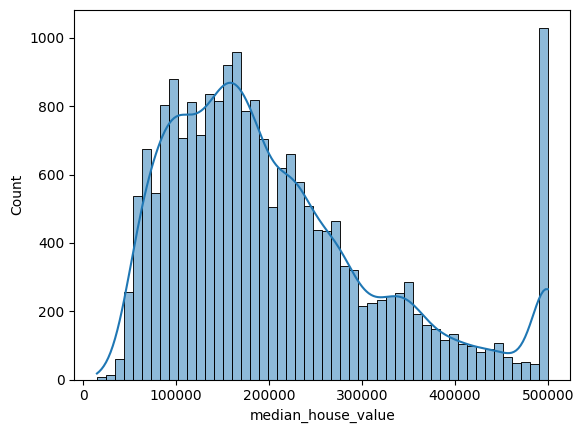

In [11]:
sns.histplot(df['median_house_value'], bins=50, kde=True)

Based on the plot the dataset didn't have the long tail

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [33]:
df_ocean_proximity = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
df_ocean_proximity

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [34]:
df_partial = df_ocean_proximity[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'population', 'households', 'latitude', 'longitude', 'total_bedrooms']]
df_partial

,median_house_value,median_income,total_rooms,housing_median_age,population,households,latitude,longitude,total_bedrooms
701,431000.0,6.0574,1283.0,32.0,485.0,171.0,37.64,-121.97,194.0
830,217000.0,4.6458,3666.0,9.0,2341.0,703.0,37.61,-121.99,711.0
859,247600.0,4.6146,4342.0,21.0,2172.0,789.0,37.57,-121.97,783.0
860,283500.0,5.7192,3575.0,15.0,1777.0,559.0,37.58,-121.96,597.0
861,216900.0,3.6832,4126.0,20.0,2079.0,975.0,37.58,-121.98,1031.0
...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,1665.0,25.0,845.0,330.0,39.48,-121.09,374.0
20636,77100.0,2.5568,697.0,18.0,356.0,114.0,39.49,-121.21,150.0
20637,92300.0,1.7000,2254.0,17.0,1007.0,433.0,39.43,-121.22,485.0
20638,84700.0,1.8672,1860.0,18.0,741.0,349.0,39.43,-121.32,409.0


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [35]:
df_partial.isnull().sum()

median_house_value      0
median_income           0
total_rooms             0
housing_median_age      0
population              0
households              0
latitude                0
longitude               0
total_bedrooms        157
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [36]:
median_population = df_partial['population'].median()
print(median_population)

1195.0


### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.


In [37]:
df_shuffled = df_partial.sample(frac=1, random_state=42)
df_shuffled

,median_house_value,median_income,total_rooms,housing_median_age,population,households,latitude,longitude,total_bedrooms
19963,70400.0,2.5875,2935.0,22.0,1927.0,530.0,36.23,-119.14,523.0
5929,224500.0,4.8125,2426.0,16.0,1319.0,446.0,34.12,-117.79,426.0
11377,260900.0,5.7301,3653.0,26.0,1930.0,585.0,33.68,-117.97,568.0
6443,233100.0,2.9422,2668.0,32.0,1512.0,541.0,34.10,-118.03,609.0
17546,289100.0,2.4306,2479.0,39.0,1990.0,506.0,37.34,-121.87,541.0
...,...,...,...,...,...,...,...,...,...
6651,500001.0,1.9923,1256.0,41.0,855.0,383.0,34.15,-118.14,407.0
17810,268400.0,6.1504,4043.0,19.0,2196.0,708.0,37.40,-121.86,764.0
6850,234400.0,3.2875,1983.0,52.0,887.0,331.0,34.07,-118.15,344.0
2161,83400.0,3.6250,1965.0,37.0,796.0,335.0,36.78,-119.81,364.0


why we must shuffle the data?

In [45]:
test_val_length = int(0.2 * len(df_shuffled))
train_length = len(df_shuffled) - 2*test_val_length

df_train = df_shuffled[:train_length].copy()
df_val = df_shuffled[train_length:train_length+test_val_length].copy()
df_test = df_shuffled[train_length+test_val_length:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Check before applying log1p

<Axes: xlabel='median_house_value', ylabel='Count'>

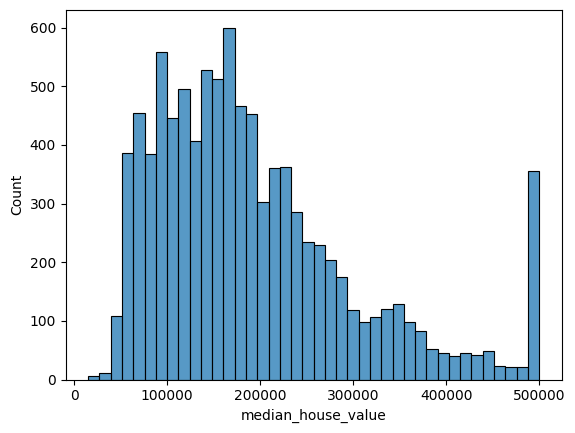

In [51]:
import seaborn as sns

y_train_orig = df_train['median_house_value'].values
y_val_orig = df_val['median_house_value'].values
y_test_orig = df_test['median_house_value'].values

sns.histplot(df_train['median_house_value'])

<Axes: ylabel='Count'>

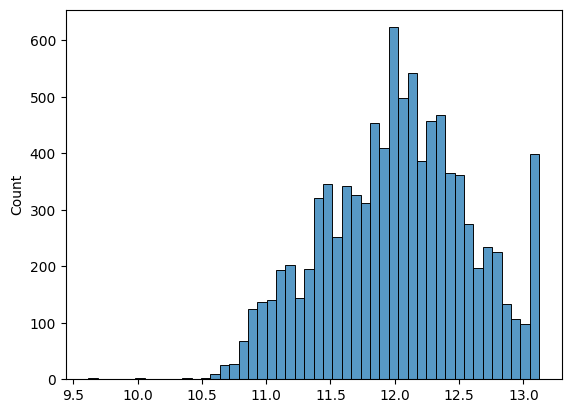

In [52]:
# Applying log transformation to the target variable
y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

sns.histplot(y_train)

In [55]:
# Remove target value from the training, validation, and test set
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [66]:
def fill_missing_values(df, column, value):
    df[column] = df[column].fillna(value)
    return df

def train_linear_regression(X, y):
    # Adding intercept
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # OLS method
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [67]:
# Using mean
total_bedrooms_mean = df_train['total_bedrooms'].mean()

X = fill_missing_values(df_train, 'total_bedrooms', total_bedrooms_mean)
w0, w = train_linear_regression(X, y_train)
print(w0)
print(w)

X_val = fill_missing_values(df_val, 'total_bedrooms', total_bedrooms_mean)
y_pred = w0 + X_val.dot(w)
print(round(rmse(y_val, y_pred),2))

-9.886133215798548
[ 1.81951358e-01 -3.87631029e-05  1.79880767e-03 -1.49641599e-04
  3.25344392e-04 -2.68652914e-01 -2.57026361e-01  3.78806885e-04]
0.34


In [63]:
# Using 0
X = fill_missing_values(df_train, 'total_bedrooms', 0)
w0, w = train_linear_regression(X, y_train)

X_val = fill_missing_values(df_val, 'total_bedrooms', 0)
y_pred = w0 + X_val.dot(w)
print(round(rmse(y_val, y_pred),2))

0.34


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001


In [68]:
X = fill_missing_values(df_train, 'total_bedrooms', 0)

In [71]:
def train_regularized_linear_regression(X, y, r=0.001):
    # Adding intercept
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # OLS method
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_regularized_linear_regression(df_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    print('%06s %0.11f' % (r, rmse_val))

     0 0.34056998014
 1e-06 0.34056998287
0.0001 0.34057025254
 0.001 0.34057272751
  0.01 0.34059968412
   0.1 0.34101110711
     1 0.34468507836
     5 0.34757708906
    10 0.34816142616


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005



> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43


## Submit the results

- Submit your results here: https://forms.gle/nNUTLzz3F9KiFHNp9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is September 25 (Monday), 23:00 CET. After that the form will be closed.